In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("wafer.csv")
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [21]:
#Dropping Unnamed columns as its not necessary
df.drop(['Unnamed: 0'], axis =1 , inplace = True)

In [23]:
df.columns, df.shape

(Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-6',
        'Sensor-7', 'Sensor-8', 'Sensor-9', 'Sensor-10',
        ...
        'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
        'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
       dtype='object', length=591),
 (100, 591))

# 1. Find if there is any duplicate values

In [25]:
df.duplicated().sum()
# No duplicate values

0

# 2. Check for null values

In [27]:
(df.isnull().mean())*100

Sensor-1       1.0
Sensor-2       0.0
Sensor-3       3.0
Sensor-4       3.0
Sensor-5       3.0
Sensor-6       3.0
Sensor-7       3.0
Sensor-8       3.0
Sensor-9       0.0
Sensor-10      0.0
Sensor-11      0.0
Sensor-12      0.0
Sensor-13      0.0
Sensor-14      0.0
Sensor-15      0.0
Sensor-16      0.0
Sensor-17      0.0
Sensor-18      0.0
Sensor-19      0.0
Sensor-20      0.0
Sensor-21      0.0
Sensor-22      0.0
Sensor-23      0.0
Sensor-24      0.0
Sensor-25      0.0
Sensor-26      0.0
Sensor-27      0.0
Sensor-28      0.0
Sensor-29      0.0
Sensor-30      0.0
Sensor-31      0.0
Sensor-32      0.0
Sensor-33      0.0
Sensor-34      0.0
Sensor-35      0.0
Sensor-36      0.0
Sensor-37      0.0
Sensor-38      0.0
Sensor-39      0.0
Sensor-40      0.0
Sensor-41      2.0
Sensor-42      2.0
Sensor-43      0.0
Sensor-44      0.0
Sensor-45      0.0
Sensor-46      0.0
Sensor-47      0.0
Sensor-48      0.0
Sensor-49      0.0
Sensor-50      0.0
Sensor-51      0.0
Sensor-52      0.0
Sensor-53   

# Dropping the columns where null values are greater then 30% as even though we fill them it will create noise
# Note in real world we need to connect with client

In [29]:
cols = []
for col in df.columns:
    if (df[col].isnull().sum()) > 35:
        df.drop([col], axis = 1 , inplace = True)
        cols.append(col)
len(cols)
df.shape

(100, 563)

# 3. # Filling the null values with Median as outlier is not treated

In [31]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].median())

In [33]:
df.isnull().sum().sum()

0

# 4. Visualizations of sensor distribution

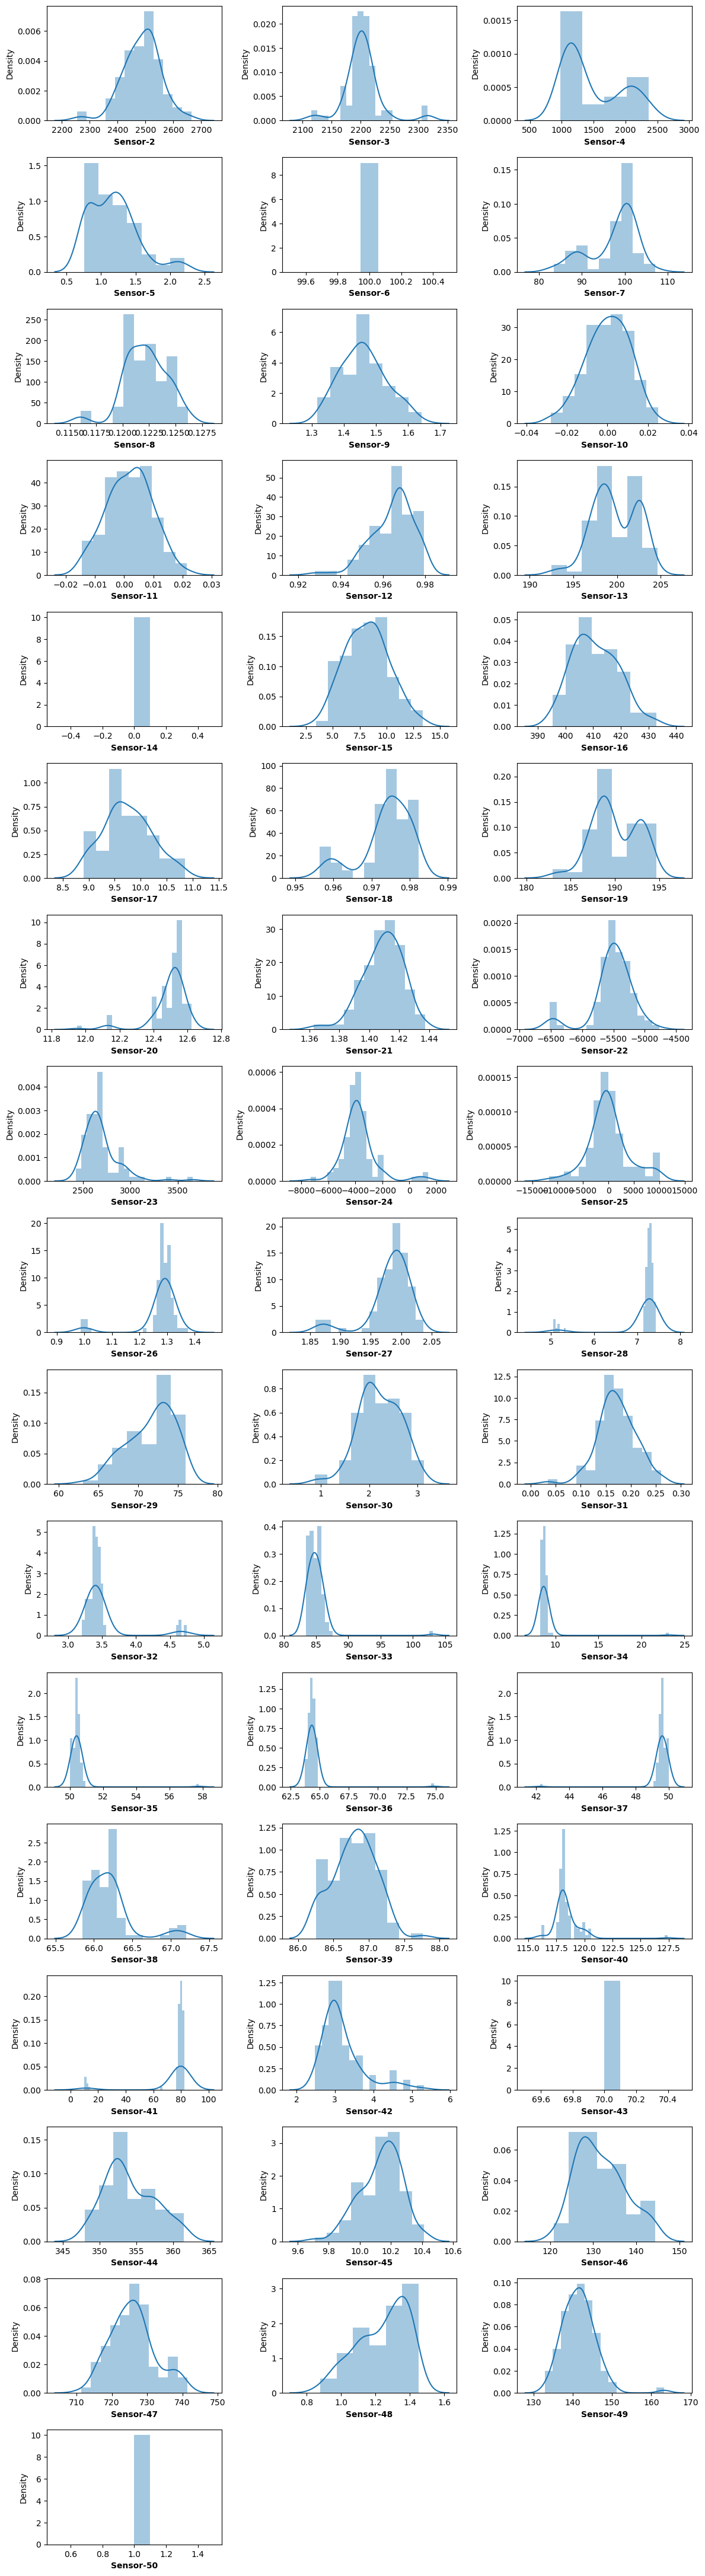

In [15]:
plt.figure(figsize= (12,130))
for i, col in enumerate(list(df.columns[1:50])):
    plt.subplot(51, 3, i+1)
    sns.distplot(df[col], hist = True, kde = True)
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [663]:
# Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deviation) or have left skewness and right skewness. 
# It ain't possible to analyze each feature and deal with its outliers individually, thus we have to depend upon the scaling.¶
# For the features with 0 standard deviation, we can straight away drop them and for others that do have outliers, 
# we gotta go ahead with the Robust Scaling

In [35]:
numerical_cols = []
for col in df.columns[:-1]:
    if df[col].dtypes != "O": 
        numerical_cols.append(col)
len(numerical_cols)

562

In [37]:
columns_Zero_STD = []
for col in numerical_cols:
    if df[col].std() == 0:
        columns_Zero_STD.append(col)
len(columns_Zero_STD)

cols_to_drop = columns_Zero_STD
len(cols_to_drop)

122

In [715]:
'''
for col in cols_to_drop:
    df.drop(columns = [col], axis = 1, inplace = True)+

'''

'\nfor col in cols_to_drop:\n    df.drop(columns = [col], axis = 1, inplace = True)+\n\n'

In [39]:
df.shape

(100, 563)

# 5 Check for class imbalance and null values

In [41]:

df['Good/Bad'].value_counts(),df['Good/Bad'].isna().sum()

(Good/Bad
 -1    94
  1     6
 Name: count, dtype: int64,
 0)

# 7 Divide x and y

In [43]:
# Divide x and y
x = df.drop(["Good/Bad"], axis = 1)
y = df['Good/Bad']

In [45]:
x.shape, y.shape

((100, 562), (100,))

In [47]:
# Train test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state=1)

In [49]:
x_train.shape,y_train.shape,x_test.shape,y_test.value_counts(), y_train.value_counts()

((70, 562),
 (70,),
 (30, 562),
 Good/Bad
 -1    28
  1     2
 Name: count, dtype: int64,
 Good/Bad
 -1    66
  1     4
 Name: count, dtype: int64)

# 8 Scaling

In [51]:
from sklearn.preprocessing import RobustScaler
RobustScaler_1 = RobustScaler()
RobustScaler_1.fit_transform(x_train)

array([[-0.61372398, -0.62001184,  0.53694303, ..., -0.6984127 ,
        -0.41269841, -0.63428905],
       [-1.01090428, -0.3178212 ,  0.39866914, ..., -0.92063492,
        -0.66666667, -0.48242947],
       [ 0.54675625, -0.32622854,  0.46281748, ...,  0.04232804,
         0.        ,  0.55685251],
       ...,
       [-0.30917502,  0.80343398, -0.87241749, ..., -0.85714286,
        -0.57142857, -0.57266315],
       [ 0.86099791, -0.553582  ,  1.01449325, ...,  0.61375661,
         0.6984127 ,  1.22180419],
       [-0.00341447, -0.80307874, -0.49608054, ...,  1.53439153,
         1.55555556, -0.08443498]])

In [53]:
RobustScaler_1.transform(x_test)

array([[-2.24253772e-01, -9.75725281e-02,  1.42409326e-03, ...,
         1.16402116e-01,  0.00000000e+00, -3.60402917e-01],
       [-3.23273488e-01, -2.42155121e-01,  5.91588869e-01, ...,
        -1.48148148e-01, -9.52380952e-02,  3.60500767e-01],
       [-9.58255314e-02, -2.36589698e-01,  5.64980135e-01, ...,
         6.03174603e-01,  6.03174603e-01,  1.02019264e+00],
       ...,
       [-1.28835775e+00, -2.80592066e+00, -5.65446280e-02, ...,
         2.01058201e-01,  5.71428571e-01, -1.58529011e-01],
       [-9.35235158e-01,  2.83718176e-01, -4.96080536e-01, ...,
         1.34391534e+00,  1.61904762e+00,  2.24155863e+00],
       [ 4.09075889e-01,  3.64831261e-01, -3.82991280e-01, ...,
         1.53439153e+00,  1.55555556e+00, -8.44349777e-02]])

In [71]:
# Model Training
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [73]:
models = { "LR" : LogisticRegressionCV(class_weight= "balanced"),
          "SVC" : SVC(kernel='linear',class_weight="balanced"),
          "LSVC" : LinearSVC(class_weight="balanced"),
          "RFC" : RandomForestClassifier(class_weight = "balanced"),
          "ABC" : AdaBoostClassifier(),
          "GBC" : GradientBoostingClassifier(),
          #"XGBC" : XGBClassifier(),
          "DTC" : DecisionTreeClassifier(class_weight="balanced"),
          "GNB" : GaussianNB(),
          "BRFC": BalancedRandomForestClassifier()
         }

In [75]:
kf = KFold(n_splits = 4, shuffle=True, random_state=1) 

Scores [ 94.44444444  88.88888889 100.          52.94117647]
Mean Score 0.8406862745098038
              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.00      0.00      0.00         2

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

 fpr [0.         0.03571429 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.48214285714285715
Model Score 0.48214285714285715
Accuracy score of LogisticRegressionCV(class_weight='balanced') is 48.214285714285715


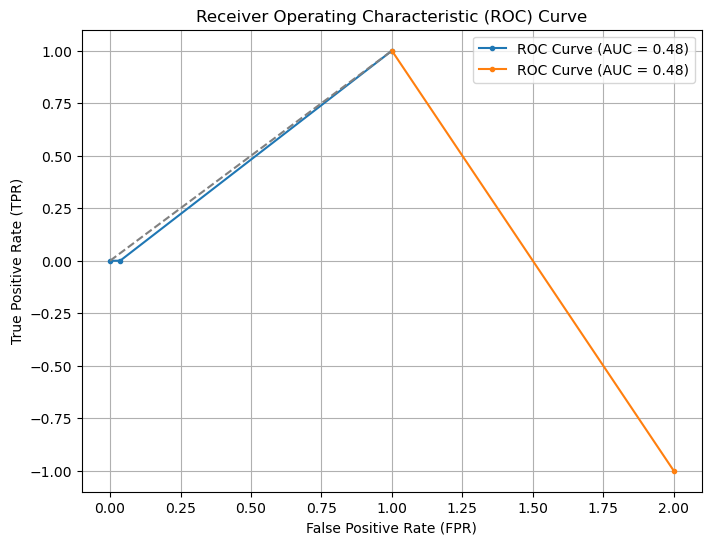

***********************************
Scores [ 88.88888889  88.88888889 100.          52.94117647]
Mean Score 0.826797385620915
              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.00      0.00      0.00         2

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

 fpr [0.         0.03571429 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.48214285714285715
Model Score 0.48214285714285715
Accuracy score of SVC(class_weight='balanced', kernel='linear') is 48.214285714285715


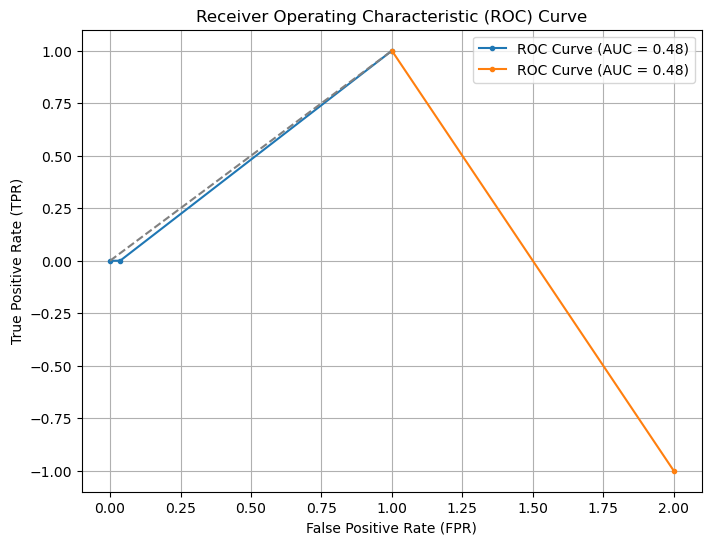

***********************************
Scores [ 94.44444444  88.88888889 100.          47.05882353]
Mean Score 0.8259803921568627
              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.00      0.00      0.00         2

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

 fpr [0.         0.03571429 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.48214285714285715
Model Score 0.48214285714285715
Accuracy score of LinearSVC(class_weight='balanced') is 48.214285714285715


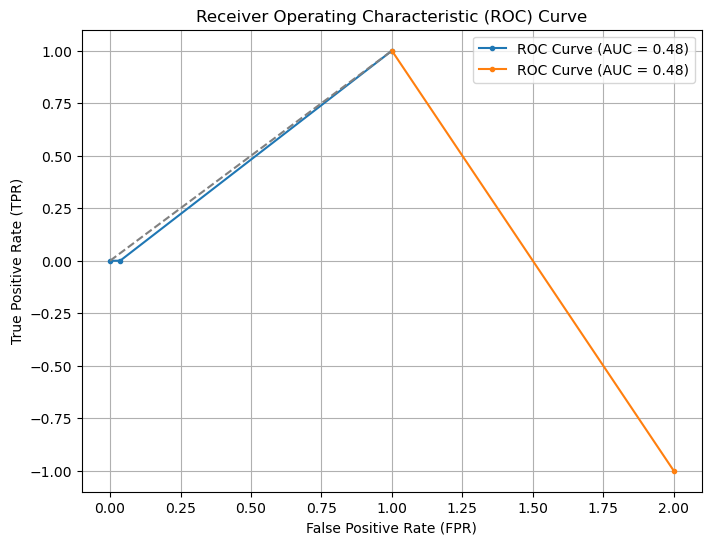

***********************************
Scores [ 94.44444444  94.44444444 100.          88.23529412]
Mean Score 0.9428104575163399
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30

 fpr [0. 1.], tpr [0. 1.], threshold [inf -1.]
AUC Score 0.5
Model Score 0.5
Accuracy score of RandomForestClassifier(class_weight='balanced') is 50.0


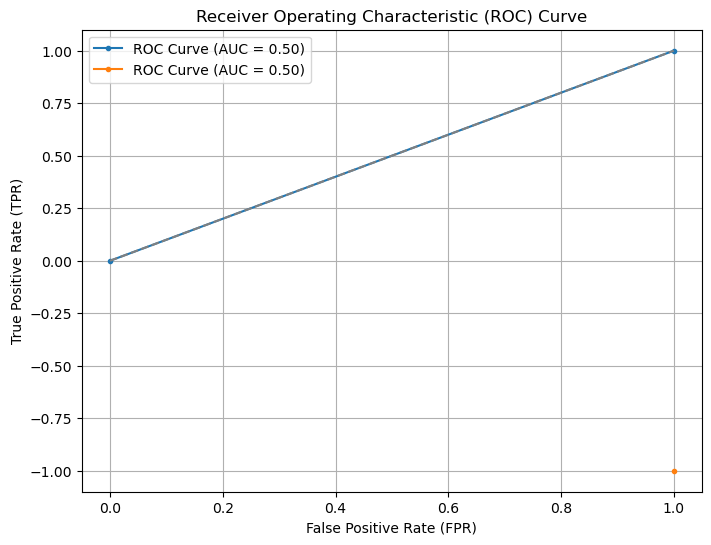

***********************************
Scores [94.44444444 94.44444444 94.11764706 88.23529412]
Mean Score 0.9281045751633986
              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.00      0.00      0.00         2

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

 fpr [0.         0.03571429 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.48214285714285715
Model Score 0.48214285714285715
Accuracy score of AdaBoostClassifier() is 48.214285714285715


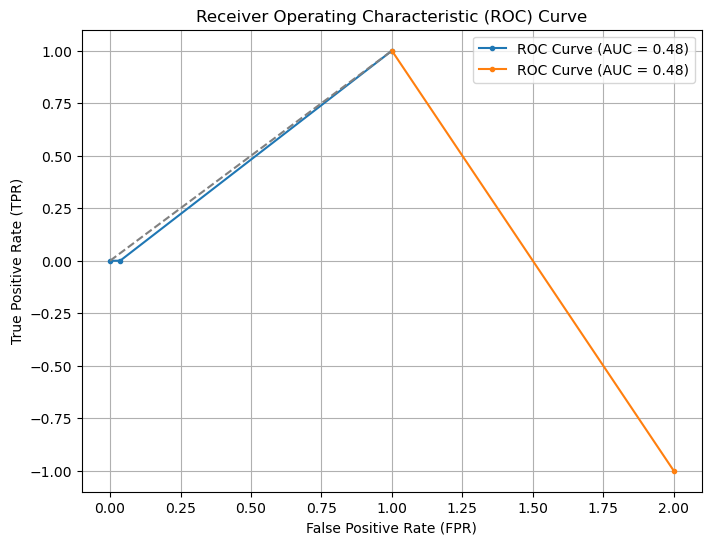

***********************************
Scores [ 94.44444444  94.44444444 100.          88.23529412]
Mean Score 0.9428104575163399
              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.00      0.00      0.00         2

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

 fpr [0.         0.03571429 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.48214285714285715
Model Score 0.48214285714285715
Accuracy score of GradientBoostingClassifier() is 48.214285714285715


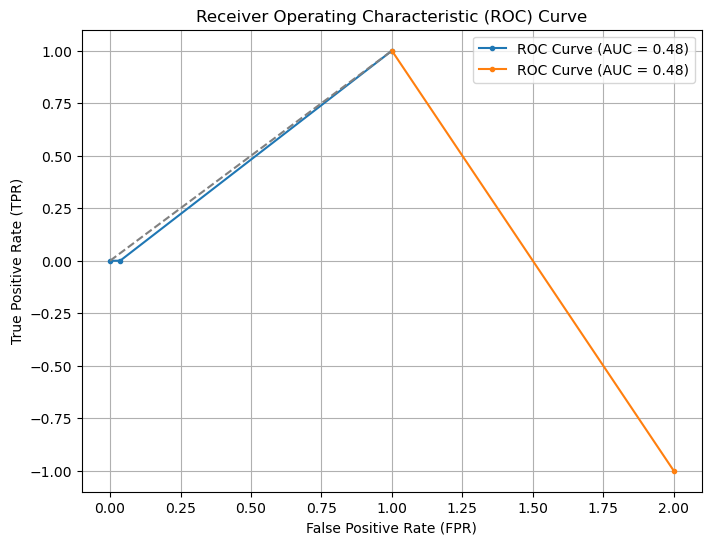

***********************************
Scores [ 94.44444444  94.44444444 100.          82.35294118]
Mean Score 0.9281045751633987
              precision    recall  f1-score   support

          -1       0.96      0.93      0.95        28
           1       0.33      0.50      0.40         2

    accuracy                           0.90        30
   macro avg       0.65      0.71      0.67        30
weighted avg       0.92      0.90      0.91        30

 fpr [0.         0.07142857 1.        ], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.7142857142857143
Model Score 0.7142857142857143
Accuracy score of DecisionTreeClassifier(class_weight='balanced') is 71.42857142857143


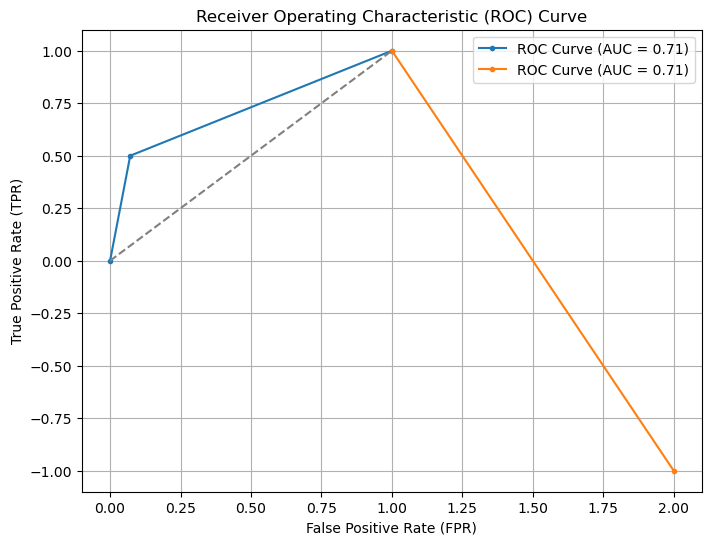

***********************************
Scores [ 94.44444444  94.44444444 100.          88.23529412]
Mean Score 0.9428104575163399
              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.50      0.67         2

    accuracy                           0.97        30
   macro avg       0.98      0.75      0.82        30
weighted avg       0.97      0.97      0.96        30

 fpr [0. 0. 1.], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.75
Model Score 0.75
Accuracy score of GaussianNB() is 75.0


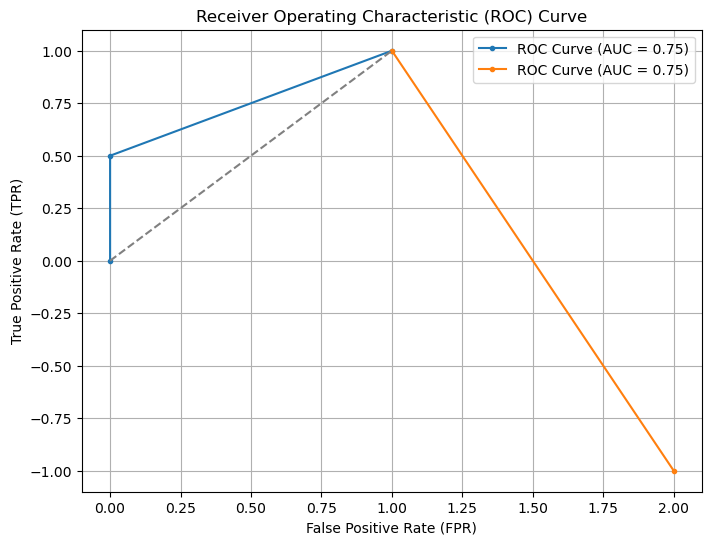

***********************************
Scores [55.55555556 61.11111111 52.94117647 70.58823529]
Mean Score 0.6004901960784315
              precision    recall  f1-score   support

          -1       1.00      0.61      0.76        28
           1       0.15      1.00      0.27         2

    accuracy                           0.63        30
   macro avg       0.58      0.80      0.51        30
weighted avg       0.94      0.63      0.72        30

 fpr [0.         0.39285714 1.        ], tpr [0. 1. 1.], threshold [inf  1. -1.]
AUC Score 0.8035714285714286
Model Score 0.8035714285714286
Accuracy score of BalancedRandomForestClassifier() is 80.35714285714286


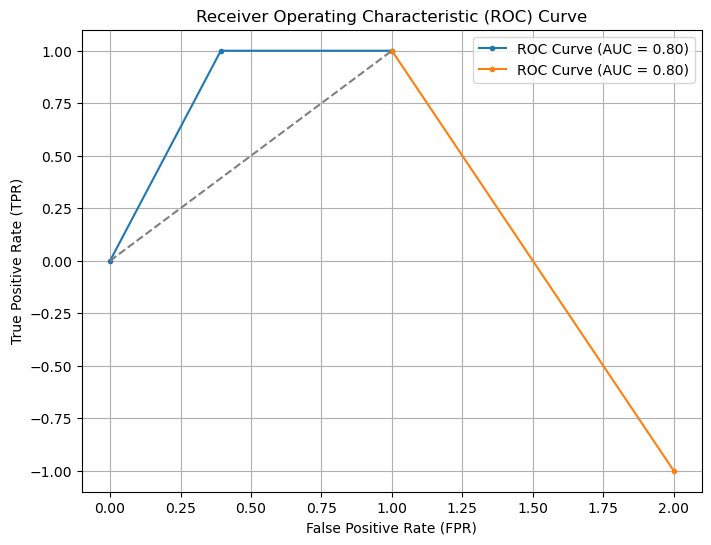

***********************************
Model with highest auc score  is -> 80.35714285714286. Model name is BRFC


In [77]:
# from sklearn.metrics import roc_curve, roc_auc_score
model_list = []
report = []
for i in range(len(models)):
    model = (list(models.values())[i])
    scores = cross_val_score(model, x_train, y_train, cv = kf)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    model_score = accuracy_score(y_test,y_pred)
    print(f" fpr {fpr}, tpr {tpr}, threshold {thresholds}")
    print("AUC Score", auc_score)
    print("Model Score", auc_score)
    print(f"Accuracy score of {model} is {auc_score * 100}")
    report.append(auc_score*100)
    model_list.append(list(models.keys())[i])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr,thresholds, marker='.', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()
    print("*"*35)

print(f"Model with highest auc score  is -> {max(report)}. Model name is {model_list[report.index(max(sorted(report)))]}")